# Péndulo simple. Conservación de energía en caso general

## Mecánica para Ingenieros. Grado en Ingeniería Civil. 

+ Alejandro E. Martínez Castro (email:amcastro@ugr.es).

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">licencia de Creative Commons Reconocimiento-NoComercial 4.0 Internacional</a>.

# Objetivos de este cuaderno

En este cuaderno se validará la solución numérica para el caso del péndulo simple no lineal. Se verificará: 
- La dependencia del paso de tiempo de integración en un método numérico. 
- Que se conserva la energía sólo de forma aproximada. 

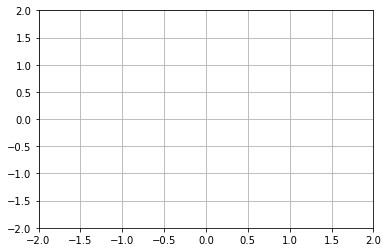

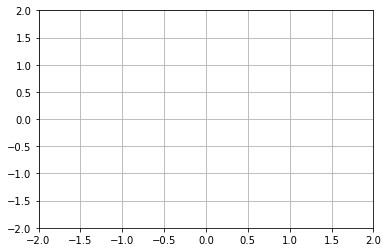

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  3 10:26:26 2017

@author: alex
"""

"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
plt.show()

# Estudio general del péndulo simple. Coordenada generalizada.

Consideremos un péndulo simple. La figura representa un hilo de longitud $l$ de masa despreciable, e inextensible. La masa $m$ se mueve bajo la acción del campo gravitatorio y la tensión del hilo. 

El ángulo $\varphi(t)$ permite posicionar la masa, y se considerará como coordenada generalizada del movimiento. 


<img src="cuaderno7_pendulo_figura1.png" width="250" border="0" hspace="12" vspace="0" alt="Pendulo_inicial">

## Segunda ley de Newton en sistema de referencia ligado a la partícula. 

Consideremos el sistema de referencia de la figura. En el mismo, se pueden descomponer los vectores $\vec{T}$ y $\vec{P}$, y establecer la segunda ley de Newton. 

El vector aceleración se descompone en aceleración normal y tangencial. 

$$\vec{a} = \vec{a}_n + \vec{a}_t$$

La componente de aceleración 


# Solución mediante métodos numéricos. 

En ingeniería es habitual tener que resolver numéricamente ecuaciones diferenciales que modelizan determinados fenómenos físicos. 

Existe un conjunto de métodos para resolver ecuaciones diferenciales ordinarias de primer orden, del tipo: 

$$ y'(t) = f(y,t)$$

con una condición inicial, del tipo $y(t_0) = y_0$. 

Es probable que el alumno conozca algunos de estos métodos si ha estudiado un curso básico de ecuaciones diferenciales ordinarias. 

Para resolver numéricamente una ecuación diferencial en Python existen diversos procedimientos. 

Pruebe buscar en Google "Python ode integration". El término "ode" hace alusión a "Ordinary Differential Equation"



## Reducción a un sistema de primer orden

El primer paso para resolver numéricamente una ecuación de orden 2 (derivadas segundas) es reducirla a un sistema (más de una) ecuación que sólo tenga derivadas primeras. 

Para esto, introduciremos la variable $\omega = \dfrac{d \varphi}{dt}$

La derivada segunda de $\varphi$ puede escribirse como una derivada primera de $\omega$. En efecto: 

$$ \ddot{\varphi} = \dot{\omega}$$

Introduciendo este cambio, es posible escribir la ecuación de gobierno del problema de la siguiente forma: 

$$\ddot{\varphi} + \dfrac{g}{l}\,\mathrm{sen}(\varphi) = 0 \Rightarrow \dot(\omega) + \mathrm{sen}(\varphi) = 0$$

El sistema de dos ecuaciones de primer orden ahora, para las variables $\varphi(t)$ y $\omega(t)$ es: 

\begin{align}
\dot{\varphi} &  = \omega \\
\dot{\omega} & = - \dfrac{g}{l}\,\mathrm{sen}(\varphi)
\end{align}

Esta ecuación puede resolverse numéricamente, si se aportan condiciones iniciales. En nuestro caso: 

- El ángulo inicial $\varphi(0) = \varphi_0$. Definiremos el ángulo en el instante inicial. 
- La velocidad inicial $\omega(0) = 0$. Asumiremos que parte del reposo. 

Veamos el código en Python que permite resolver el problema de forma numérica

Frecuencia angular aproximada bajas oscilaciones
Omega_lineal =  0.7
Periodo lineal  8.97597901026


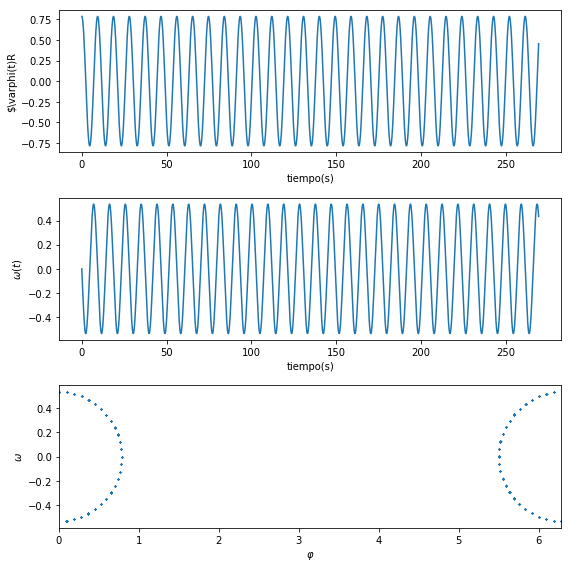

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    phi, omega = y      # Asignamos a la variable y las dos variables del sistema, phi y omega
    g, l = params       # Definimos los parámetros g y l (aceleración de la gravedad y longitud del hilo)
    derivs = [omega ,   # Lista con las dos derivadas 
             - g/l*np.sin(phi)] 
    return derivs

# Parámetros
g = 9.8          # Aceleración de la gravedad, m/s2
l = 20           # Longitud del péndulo 

# ESTIMACIÓN DEL PERIODO FUNDAMENTAL CON OSCILACIONES DE PEQUEÑA AMPLITUD
# La justificación se estudiará en oscilaciones lineales.

print ("Frecuencia angular aproximada bajas oscilaciones") 
fangular_lineal = np.sqrt(g/l)
print ("Omega_lineal = ", fangular_lineal)

periodo_lineal = (2.*np.pi / fangular_lineal)
print ("Periodo lineal ", periodo_lineal)

# Valores iniciales
theta0 = 45 # Ángulo inicial en grados de la masa del péndulo

theta0 = np.deg2rad(45)     # Ángulo en radianes
omega0 = 0.0                # Velocidad inicial de la masa del péndulo.

# Parámetros para el solver de la Ecuación Diferencial Ordinaria (ODE)
params = [g, l]

# Condiciones iniciales
y0 = [theta0, omega0]

# Definición de una lista de tiempos en los que se calcula la solución.
tStop = 30 * periodo_lineal
tInc = periodo_lineal / 50 # Paso de tiempo de integración: 1/100 del periodo aproximado con teoría lineal
t = np.arange(0., tStop, tInc)

# Llamada al solver de la Ecuación Diferencial Ordinaria (ODE)
psoln = odeint(f, y0, t, args=(params,))

# Dibujo de los resultados
fig = plt.figure(1, figsize=(8,8))

# Dibujo de phi en función del tiempo
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('tiempo(s)')
ax1.set_ylabel(r'$\varphi(t)R')

# Dibujo de omega en función del tiempo
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('tiempo(s)')
ax2.set_ylabel(r'$\omega(t)$')

# Dibujo de omega frente a phi
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel(r'$\varphi$')
ax3.set_ylabel(r'$\omega$')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()

## Conservación de energía

De las dos fuerzas que actúan sobre la partícula, la tensión del hilo es siempre perpendicular al vector desplazamiento en cada instante. Por tanto, no provoca trabajo. La fuerza del peso $\vec{P}$ provoca un trabajo, que puede calcularse como fuerza conservativa. 

En todo instante, ha de verificarse que 

$$T + V = cte$$

Siendo: 

- $\vec{T} $, Energía cinética de la partícula, $\vec{T} = \dfrac{1}{2} m \,\vec{v}\cdot\vec{v}$. Esta energía puede calcularse en el movimiento de rotación como $T =\dfrac{1}{2} I_0 \,(\dot{\varphi})^2$, siendo $I_0 = m\,l^2$

- $V$ = Energía potencial de la partícula. En el sistema de referencia propuesto, $V = - m\,g\,x$, puesto que la fuerza del peso es $\vec{P} = m\,g\,\vec{i}$

La componente $x = l \,cos(\phi)$

A partir de la solución numérica, podemos calcular en todo instante de tiempo la función: 

$$ T + V = \dfrac{1}{2}\,m\,l^2 \,(\dot{\varphi})^2 - m\,g\,l\,cos(\varphi)$$

Esta expresión debe ser constante. Si no lo es, es porque el mñetodo de integración numérica ha cometido algún error.

In [38]:
def sumaenergia(fi,omega):
    return 1/2 * l**2 * omega**2 - g * l * np.cos(fi)

In [39]:
angulo_fi = psoln[:,0]
omegas = psoln[:,1]

In [40]:
eqenergia = sumaenergia(angulo_fi,omegas)

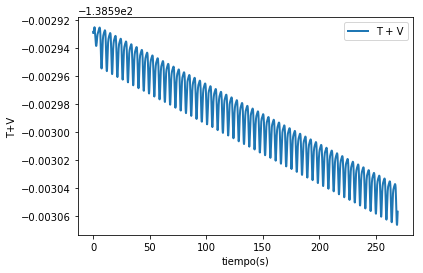

In [41]:
line, = plt.plot(t ,eqenergia, label = "T + V", linewidth = 2.0),


plt.xlabel(r'tiempo(s)')       #Etiqueta del eje x
plt.ylabel("T+V")           #Etiqueta del eje y

plt.legend(loc=0)  # Mostrar leyenda en posición óptima (loc=0)
plt.show()         # Mostrar figura final

### Conclusión

Observando la gráfica anterior, verá que en el eje de ordenadas se representa el ángulo (en radianes) y en el eje de abscisa el tiempo. Nótese que a medida que aumenta el ángulo inicial, el periodo de la oscilación aumenta. El periodo es la diferencia de tiempos de paso ascendente por cero. 

Nótese que para los tres primeros ángulos se obtiene un periodo muy parecido. Son ángulos pequeños, para los cuales la aproximación del seno por el ángulo (en radianes) es correcta. 

Para valores más altos se observa que, a medida que aumenta el ángulo inicial, aumenta el periodo. Esta dependencia de la amplitud inicial es un efecto no lineal.

Finalmente, se guardará en fichero para visualización sin requerir el cuaderno

In [3]:
fig2.savefig("pendulo_matematico.pdf")